In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Load data
data = pd.read_csv("/content/Filtered_Influencer_Descriptions.csv")

In [ ]:


# Assuming 'data' is your DataFrame
data.drop('Rating', axis=1, inplace=True)


In [ ]:
data.head(5)

,Influencer ID,Influencer Username,Influencer Name,Influencer Description,Platform,Followers/Subscribers,Country,Age,Category,Number of Categories per Influencer,...,Post Success/Reach (Conversion Rate),Likes,Comments,Shares,Brand Connection,Trend Index,Perceived Credibility,Commerciality,Interest,Willingness
0,51283,user_51283,Brittany Lee,Brittany Lee is a engaging and informative Bea...,Instagram,174297,Australia,43,Beauty,1,...,2.39,625391,9745,4811,Medium,89.27,Medium,Low,3.46,6.88
1,87265,user_87265,Brandon Richards,Brandon Richards is a engaging and informative...,Twitter,805178,Australia,28,Gaming,3,...,4.19,574484,7758,345,Low,51.51,High,Low,4.11,7.03
2,24652,user_24652,Mary Russell,Mary Russell is a insightful and expert-driven...,Snapchat,6621136,Australia,40,Finance,2,...,7.58,840073,5736,175,Low,51.22,High,Low,9.94,8.99
3,34278,user_34278,David Parker,David Parker is a dynamic and highly engaging ...,Snapchat,9463579,Australia,35,Fitness,2,...,5.59,954267,2465,3040,High,52.15,High,Low,4.75,5.06
4,81965,user_81965,Matthew Casey,Matthew Casey is a engaging and informative Be...,Instagram,1939304,Australia,37,Beauty,3,...,5.38,448356,4185,1374,Low,33.73,Low,Low,2.62,5.96


In [ ]:
data.dtypes

Influencer ID                             int64
Influencer Username                      object
Influencer Name                          object
Influencer Description                   object
Platform                                 object
Followers/Subscribers                     int64
Country                                  object
Age                                       int64
Category                                 object
Number of Categories per Influencer       int64
Budget per Post                         float64
Post Frequency                            int64
Sponsored Post Frequency                  int64
Engagement Trends (Last Year)           float64
Engagement Trends (Last Month)          float64
Post Success/Reach (Conversion Rate)    float64
Likes                                     int64
Comments                                  int64
Shares                                    int64
Brand Connection                         object
Trend Index                             

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-8-560c795e1c63>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Platform', data=data, palette='viridis')


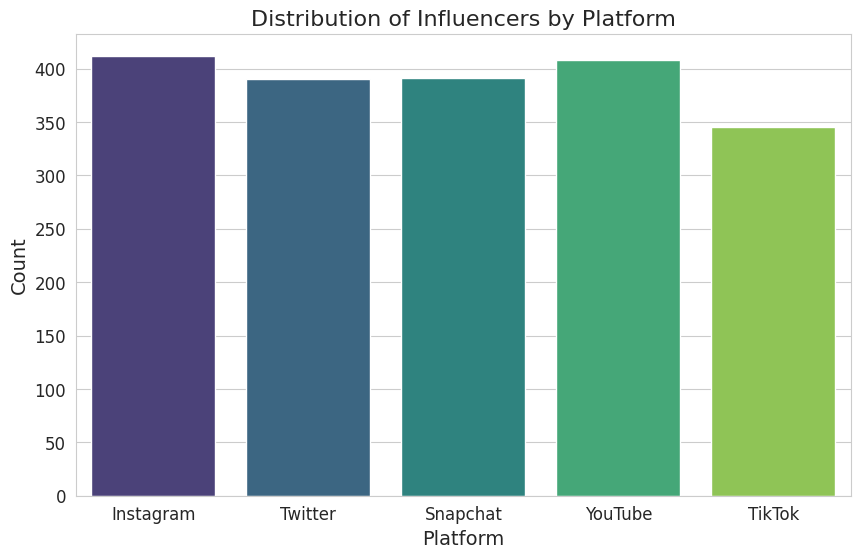

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Distribution of influencers by platform
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', data=data, palette='viridis')
plt.title('Distribution of Influencers by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-9-b0134c00fd1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='muted')


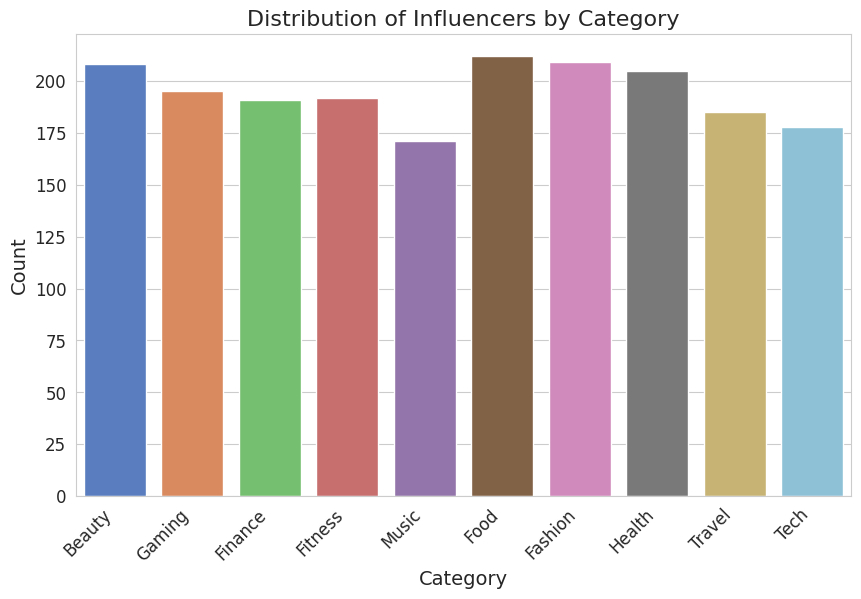

In [ ]:
# Distribution of influencers by category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data, palette='muted')
plt.title('Distribution of Influencers by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<ipython-input-10-b1d82ce8d0d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index, palette='pastel')


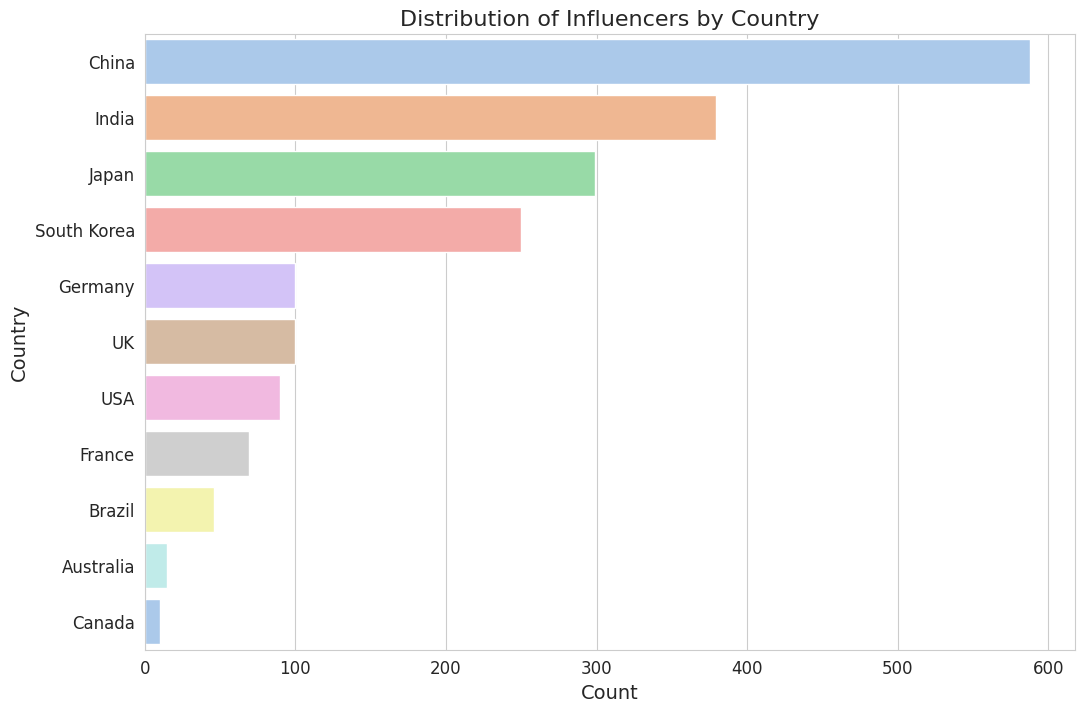

In [ ]:
# Distribution of influencers by country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index, palette='pastel')
plt.title('Distribution of Influencers by Country', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

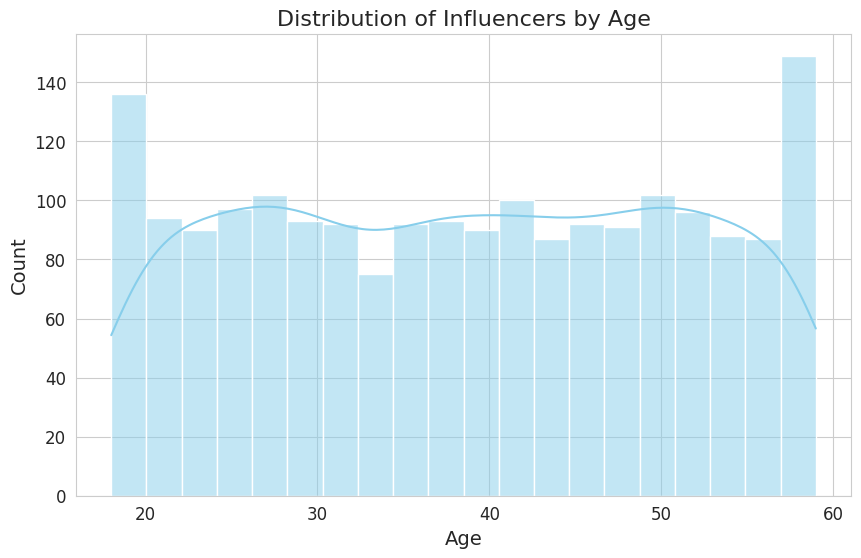

In [ ]:
# Distribution of influencers by age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Influencers by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

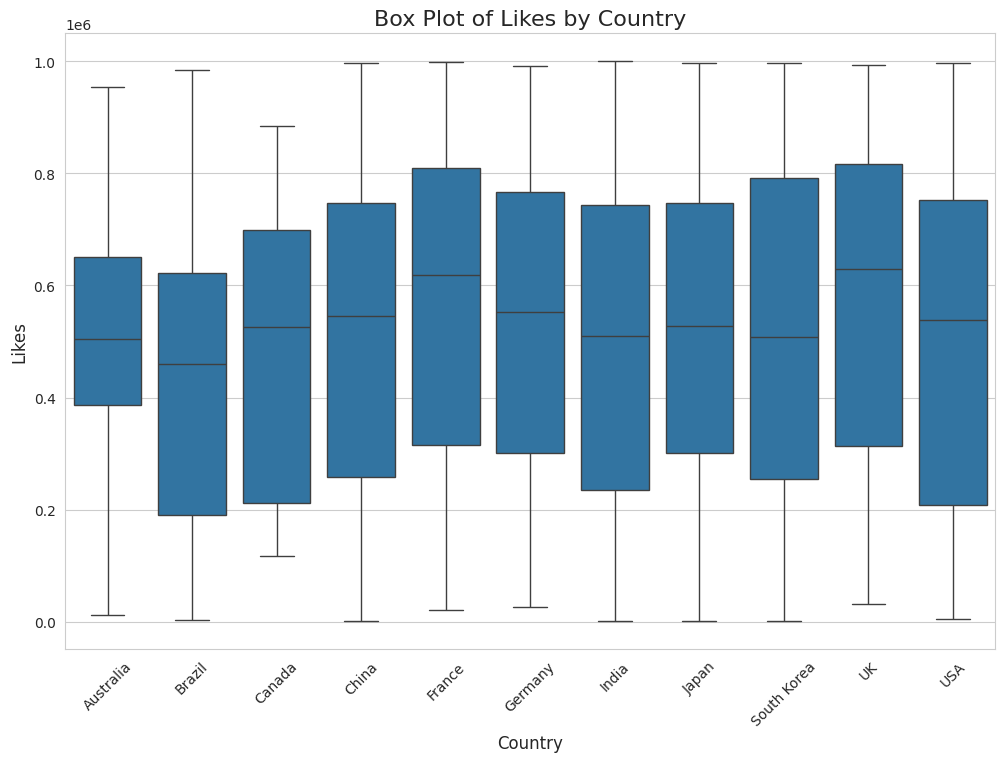

In [ ]:
# Box plot of 'Likes' by 'Country'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Likes', data=data)
plt.title('Box Plot of Likes by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-f69bd1a1680f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Platform', y='Likes', data=data, ci='sd')  # ci='sd' for standard deviation


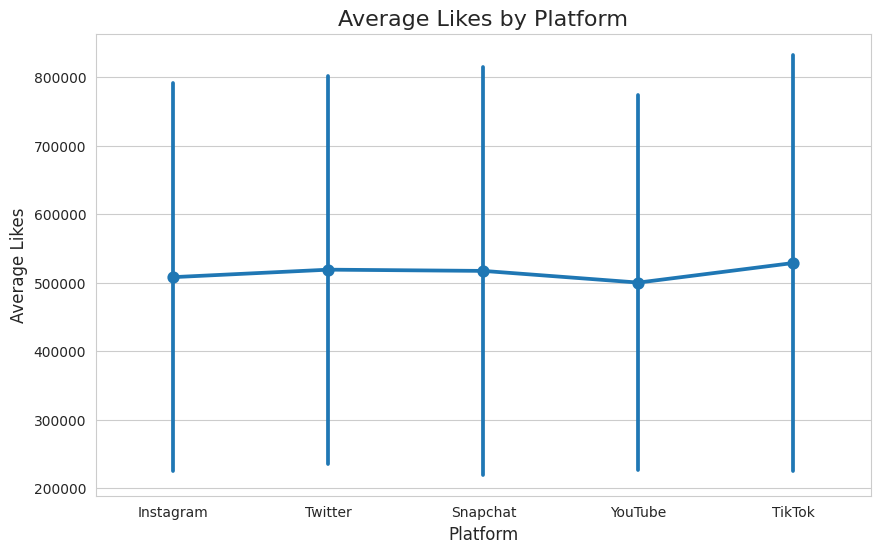

In [ ]:
# Point plot of average 'Likes' by 'Platform'
plt.figure(figsize=(10, 6))
sns.pointplot(x='Platform', y='Likes', data=data, ci='sd')  # ci='sd' for standard deviation
plt.title('Average Likes by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Average Likes', fontsize=12)
plt.show()
